In [1]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline  
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score  
from joblib import dump  
from math import sqrt
from sklearn.tree import plot_tree  
import matplotlib.pyplot as plt  
import re
import numpy as np
from math import ceil  
from collections import defaultdict

In [2]:
df = pd.read_csv("data/final/FixedSalaryFinal.csv")

In [3]:
df.head(5)

,_id,city,salary,experience,education,company,companyType,salary_type,salary_min,salary_max,salary_base,province,is_outlier
0,0021d67ace2b055296445ba037bb8014vw,B383,4-6K·15薪,EKk,GP,company_453698,type_uTAWZv,B15,60000,90000,15,B,False
1,0021d67ace2b055296445ba037bb8014vw,D672,4-5K,EdD,GP,company_419070,type_uTAWZv,M,48000,60000,12,D,False
2,0021d67ace2b055296445ba037bb8014vw,D832,2-4K,EdD,GP,company_592101,type_uTAWZv,M,24000,48000,12,D,False
3,0021d67ace2b055296445ba037bb8014vw,E027,3-4K,EdD,GP,company_415791,type_uTAWZv,M,36000,48000,12,E,False
4,0021d67ace2b055296445ba037bb8014vw,E727,2-3K,EdD,GP,company_835204,type_uTAWZv,M,24000,36000,12,E,True


### 预处理

In [4]:
df.sort_values(by=['province', 'city'], inplace=True)
df['new_city_code'] = None
  
current_code = 0
previous_province = None  
previous_citycode = None
for index, row in df.iterrows():  
    if row['province'] != previous_province:  
        current_code = 0
    if index:
        if previous_citycode != row['city']:
            current_code += 1
    
    df.at[index, 'new_city_code'] = current_code
    previous_province = row['province']
    previous_citycode = row['city']

In [5]:
counter = defaultdict(int)
for index, row in df.iterrows():  
    company_type = row['companyType']
    first_ = company_type[5:6]
    counter[first_] += 1

    df.at[index, 'companyType_first'] = first_

In [6]:
df

,_id,city,salary,experience,education,company,companyType,salary_type,salary_min,salary_max,salary_base,province,is_outlier,new_city_code,companyType_first
502,02120b8a907537fee739216562384f27Lf,A050,5-9K,EdD,GI,company_495997,type_ZcPYrP,M,60000,108000,12,A,False,1,Z
855,0267d6bf768486fee9e135bb99d78821Km,A050,10-15K,Eqh,GI,company_824862,type_fFlUqG,M,120000,180000,12,A,False,1,f
3896,04c26f94437c683d665b894696218457go,A050,5-10K,EdD,GP,company_797398,type_ruszQK,M,60000,120000,12,A,False,1,r
4047,050716a1e3496566de850636d9e7eb8dUa,A050,2-5K,EdD,GP,company_255263,type_FdhMSx,M,24000,60000,12,A,True,1,F
4048,050716a1e3496566de850636d9e7eb8dUa,A050,3-4K,EdD,GP,company_779366,type_kCfcsh,M,36000,48000,12,A,False,1,k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179632,edb8f555c04b654d9b005d76b63ffc76rZ,Z885,5-6K,EdD,GP,company_601372,type_qGLNuz,M,60000,72000,12,Z,False,15,q
180800,efaa2b8bd2a6b5ba1400b8f9d5a4c302ub,Z885,4-6K,EdD,Go,company_782797,type_XqvUzw,M,48000,72000,12,Z,False,15,X
185060,f59c44a5dd839c3438d134bd4c30a69bJx,Z885,4-9K,EdD,GI,company_682974,type_lOdYUb,M,48000,108000,12,Z,False,15,l
186534,f693da772b6ba497215104c0b3c3f571hM,Z885,4-5K,EdD,GP,company_144052,type_PCcrub,M,48000,60000,12,Z,False,15,P


In [7]:
data = df[df['is_outlier']]

## Model

In [24]:
categorical_cols = ['_id' ,'experience', 'education', 'province', 'companyType_first', 'companyType']  
integer_col = ['new_city_code']  
    
onehot_encoder = OneHotEncoder(handle_unknown='ignore')  
label_encoder = LabelEncoder()  
  
preprocessor = ColumnTransformer(  
    transformers=[  
        ('onehot', onehot_encoder, categorical_cols),   
    ],
    remainder='passthrough'  
)  

### 数据集划分·

In [25]:
X = data[categorical_cols]  
y = data['salary_min']  

* Origin

In [26]:



# # 划分训练集和测试集  
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # X_train = X_test = X
# # y_train = y_test = y

In [27]:
test_size = 0.2

X_train_list, y_train_list = [], []  
X_test_list, y_test_list = [], []
X_columns = categorical_cols + integer_col  
y_column = 'salary_max'
  
grouped = data.groupby(['_id', 'companyType_first', 'province'])

rec_test_samples = []
for name, group in grouped:  
    group_size = len(group)  
    test_samples = max(1, ceil(test_size * group_size))
    rec_test_samples.append(test_samples)
      
    if test_samples == group_size:  
        X_test_list.append(group[X_columns])  
        y_test_list.append(group[y_column])  
        X_train_list.append(group[X_columns])
        y_train_list.append(group[y_column])
    else:  
        test_indices = group.sample(n=test_samples).index  
        train_indices = group.index.difference(test_indices)  
          
        X_test_list.append(group.loc[test_indices, X_columns])  
        y_test_list.append(group.loc[test_indices, y_column])  
          
        X_train_list.append(group.loc[train_indices, X_columns])  
        y_train_list.append(group.loc[train_indices, y_column])  
  
X_train = pd.concat(X_train_list, ignore_index=True)  
y_train = pd.concat(y_train_list, ignore_index=True)  
X_test = pd.concat(X_test_list, ignore_index=True)  
y_test = pd.concat(y_test_list, ignore_index=True)

### 训练

In [28]:
model = DecisionTreeRegressor(random_state=10)  
  
pipeline = Pipeline([  
    ('preprocessor', preprocessor),  
    ('model', model)  
])  

we heave test the following rondom_state:
- 42
- 10(_id, cpT_f, province)+categorical_cols = ['_id' ,'experience', 'education', 'province', 'companyType_first', 'companyType'] + integer_col = ['new_city_code'] 

In [29]:
pipeline.fit(X_train, y_train)

C:\Users\WPX\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['_id', 'experience',
                                                   'education', 'province',
                                                   'companyType_first',
                                                   'companyType'])])),
                ('model', DecisionTreeRegressor(random_state=10))])

In [30]:
onehot_feature_names = pipeline[:-1].get_feature_names_out()  

In [31]:
y_pred = pipeline.predict(X_test)
y_trainpred = pipeline.predict(X_train)

In [32]:
results_df = pd.DataFrame({  
    'y_pred': y_pred,  # 预测值列  
    'y_test': y_test   # 真实值列  
})

results_train = pd.DataFrame({
    'y_pred': y_trainpred,
    'y_train': y_train,
})

In [33]:
results_df.head(60)

,y_pred,y_test
0,72000.0,72000
1,36000.0,36000
2,36000.0,36000
3,72000.0,72000
4,180000.0,180000
5,108000.0,108000
6,240000.0,240000
7,96000.0,48000
8,132000.0,132000
9,560000.0,560000


## Overview

### 模型信息查看

In [34]:
model.feature_importances_

array([3.86423252e-06, 2.65313351e-06, 2.10536667e-04, ...,
       6.92307510e-04, 4.71669884e-06, 6.15045942e-02])

In [35]:
dfx = pd.DataFrame(model.feature_importances_)
dfx

,0
0,0.000004
1,0.000003
2,0.000211
3,0.000450
4,0.000010
...,...
1918,0.000279
1919,0.000504
1920,0.000692
1921,0.000005


### 结果可视化

In [37]:
mse = mean_squared_error(y_pred, y_test)
mse_train = mean_squared_error(y_trainpred, y_train)

show = [mse, mse_train]
show

[4708718934.645917, 186427659.23683596]

[6029831358.9854765, 148836859.96051523]

[5195698107.9117565, 100187161.25651084]

[1882556360.7046676, 73682938.51298605]

----

[3642066377.8527784, 304594929.26954085]


In [38]:
allDataLength = len(y_pred)
indices = np.arange(1000)  

# plt.figure(figsize=(10, 6))  
# plt.bar(indices, results_df["y_test"].head(300), width=0.4, color='g', align='center')  
# plt.bar(indices + 0.4, results_df["y_pred"].head(300), width=0.4, color='b', align='center')  
    
# plt.show()

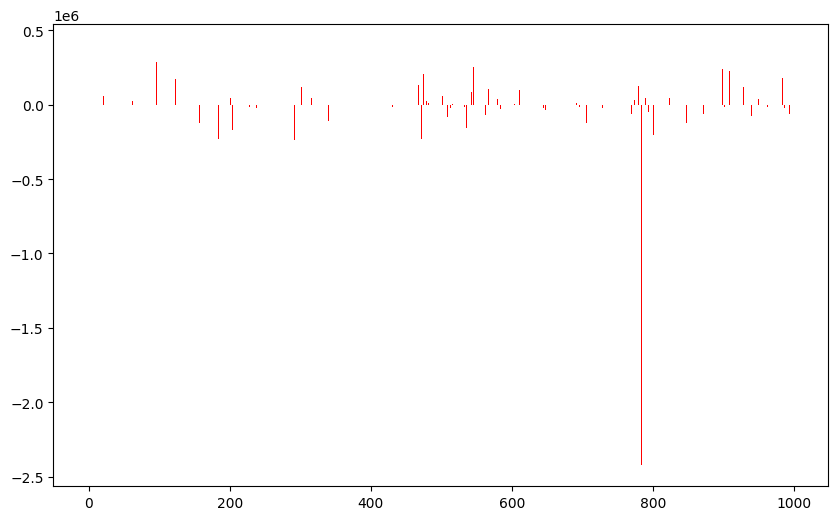

In [39]:
results_df["delta"] = results_df["y_pred"]-results_df["y_test"]

plt.figure(figsize=(10, 6))  
plt.bar(indices, results_df["delta"].head(1000), width=0.4, color='r', align='center')  
plt.show()

<BarContainer object of 1000 artists>

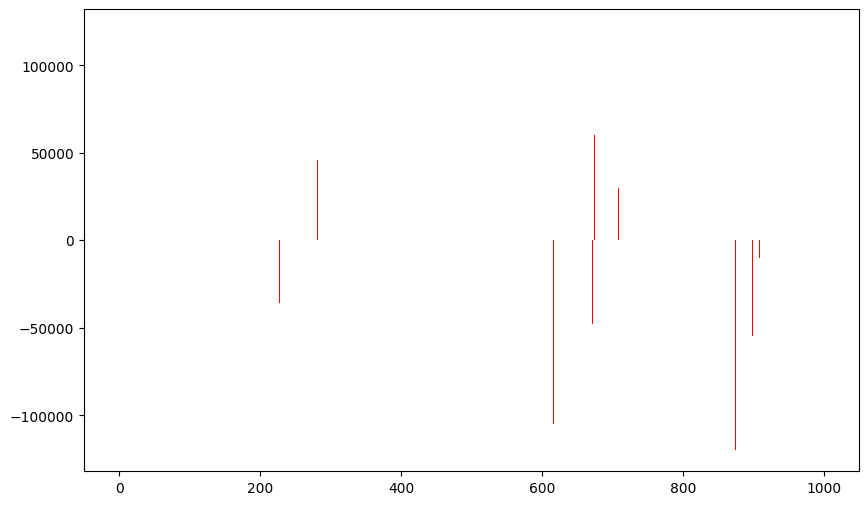

In [40]:
indices = np.arange(1000)

results_train["delta"] = results_train["y_pred"]-results_train["y_train"]

plt.figure(figsize=(10, 6))  
plt.bar(indices, results_train["delta"].head(1000), width=0.4, color='r', align='center')  

In [41]:
num_features_used_by_model = model.tree_.n_features  
if len(onehot_feature_names) < num_features_used_by_model:  
    print("特征名称列表不完整，请添加缺失的特征名称。")

In [42]:
dfx['feature'] = onehot_feature_names
dfx.columns = ['value', 'feature']

In [43]:
dfx_sorted = dfx.sort_values(by = ['value'], ascending = False)
dfx_sorted.head(50)

,value,feature
1691,0.099315,onehot__education_Gx
1922,0.061505,remainder__new_city_code
1685,0.037120,onehot__experience_EzN
1684,0.025924,onehot__experience_Eqh
1709,0.020456,onehot__province_P
1680,0.020430,onehot__experience_EaZ
1688,0.020167,onehot__education_GZ
1704,0.017940,onehot__province_K
1774,0.017711,onehot__companyType_type_BLfSmG
1540,0.011801,onehot___id_e943d3ee1527a1aba19d6537d387d320wn


In [49]:
counter = defaultdict(int)

features = ['_id', 'education', 'experience', 'province', 'new_city_code']
for index, row in dfx.iterrows():
    for feature in features:
        if feature in row['feature']:
            counter[feature] += row['value']

    if 'companyType_first' in row['feature']:
        counter['companyType_first'] += row['value']
    elif 'companyType' in row['feature']:
        counter['companyType'] += row['value']

result = pd.DataFrame.from_dict(counter, orient='index', columns=['count']).rename_axis('Feature')  
result.columns = ['calc']

In [56]:
plt.figure(figsize=(15,10))  

colors = ['#f0d9e6', '#e6c2d9', '#d9a9cc', '#cca0bf']

painter_name = ['experience', 'education', 'province', 'companyType']
painter = [result.calc['experience'], result.calc['education'], result.calc['province'], result.calc['companyType']]
painterSum = 0
for x in painter:
    painterSum += x

for i in range(len(painter)):
    painter[i] = painter[i]/painterSum

painter

[0.21620176152567142,
 0.3275006905238677,
 0.21742055363795137,
 0.2388769943125095]

<Figure size 1500x1000 with 0 Axes>

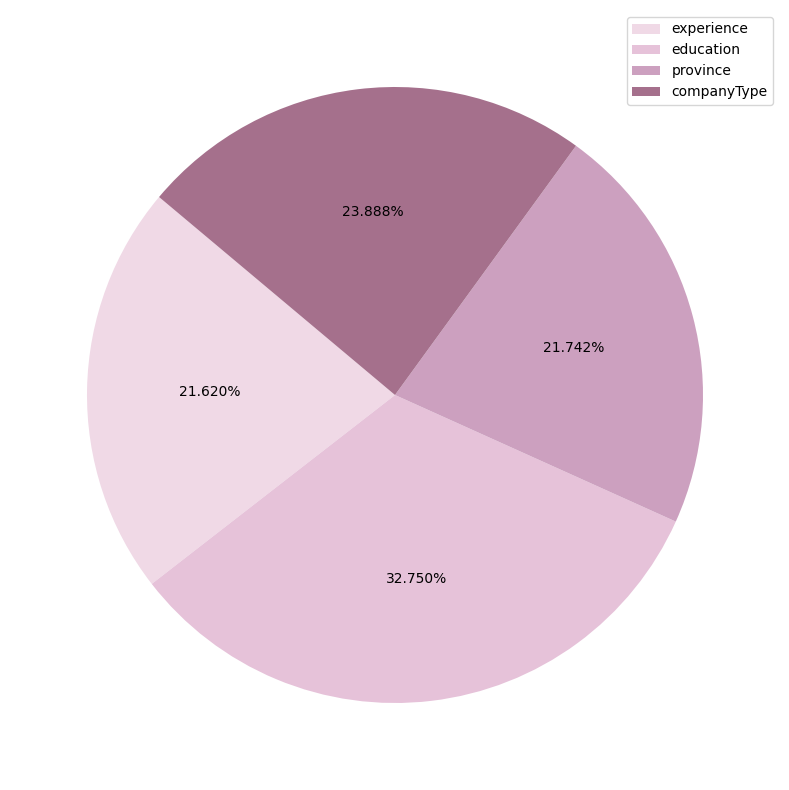

In [59]:
plt.figure(figsize=(15,10))  

colors = ['#f0d9e6', '#e6c2d9', '#cca0bf', '#a5708c']

pie = plt.pie(painter, autopct='%1.3f%%', startangle=140, colors=colors)
plt.legend(pie[0], painter_name, loc="best")

plt.show()

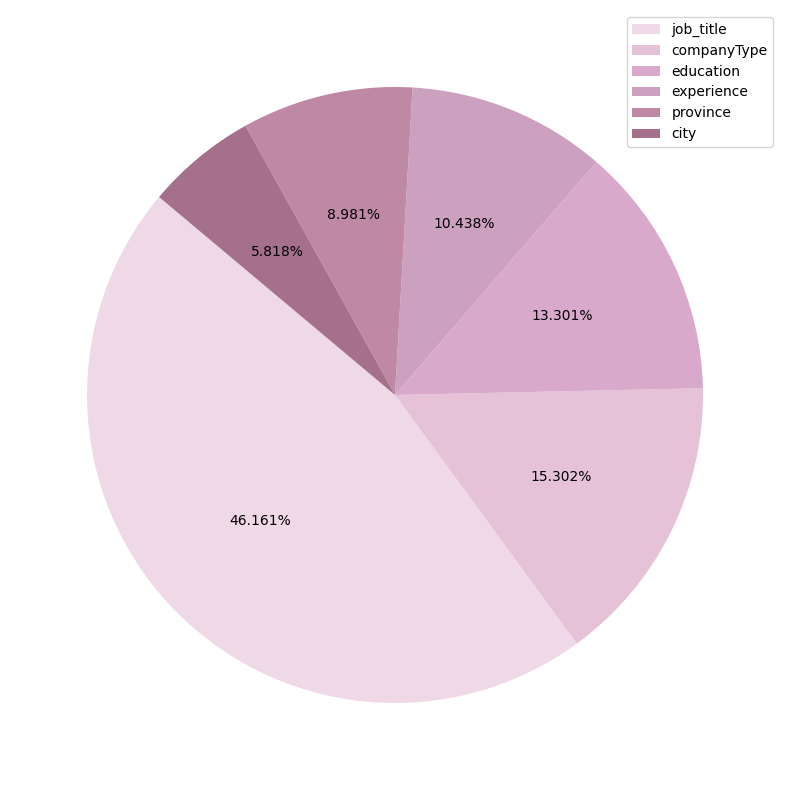

In [42]:
plt.figure(figsize=(15,10))  

colors = ['#f0d9e6', '#e6c2d9', '#d9a9cc', '#cca0bf', '#bf88a5', '#a5708c']

pie = plt.pie(result['count'], autopct='%1.3f%%', startangle=140, colors=colors)
legend_list = result.index.to_list()
legend_list[-1] = 'city'
legend_list[0] = 'job_titles'
plt.legend(pie[0], legend_list, loc="best")

plt.show()

In [41]:
legend_list

['', '_id', 'companyType', 'education', 'experience', 'province', 'city']

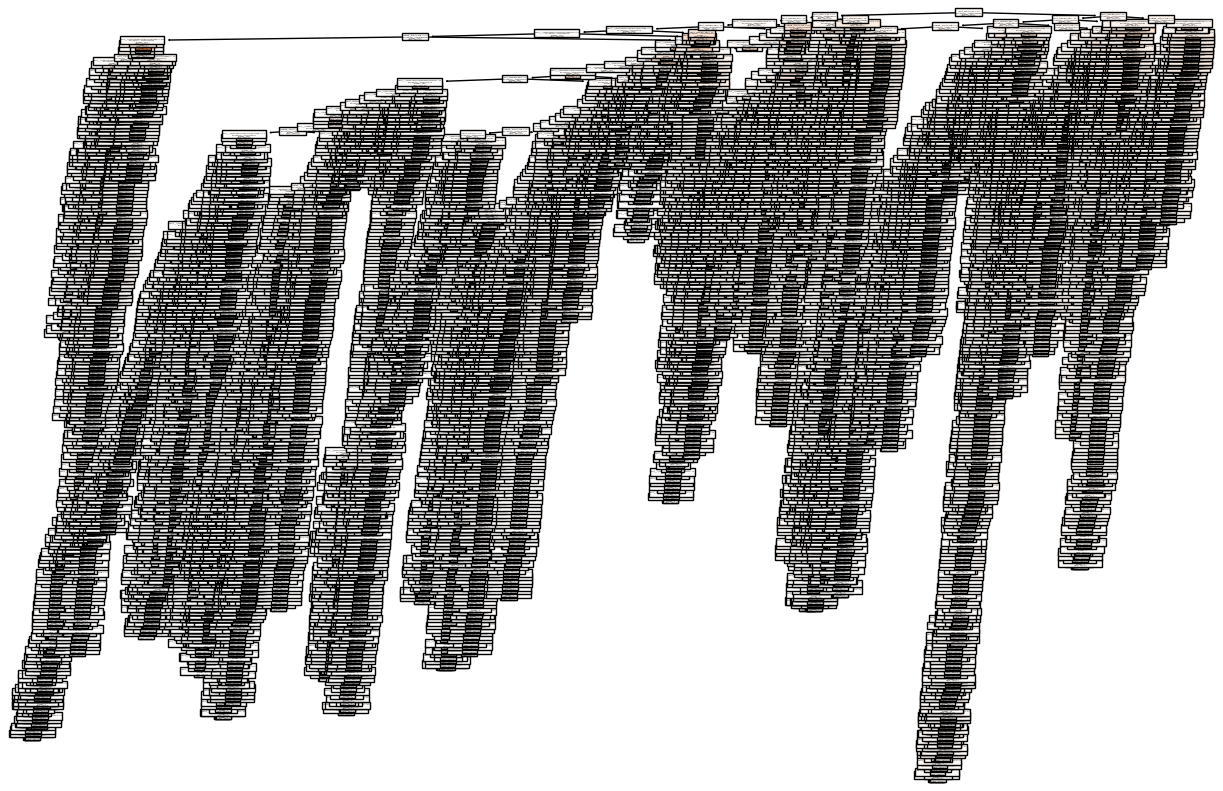

In [160]:
plt.figure(figsize=(15,10))  
plot_tree(model,   
          feature_names=onehot_feature_names,   
          filled=True)   
plt.show()